# Predicting stock prices with Facebook prediction tool fbprophet

In [1]:
%pip install prophet
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached holidays-0.77-py3-none-any.whl.metadata (46 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 60.4 MB/s eta 0:00:00 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.7 MB/s eta 0:00:00a 0:00:01
Using cached holidays-0.77-py3-none-any.whl (1.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
warnings.simplefilter(action='ignore', category = FutureWarning)

In [4]:
end = dt.datetime.now()
start = dt.datetime(end.year - 30, end.month, end.day)

In [21]:
df = yf.download('TSLA', start, end, auto_adjust = False)['Adj Close']
df

[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2025-07-17,319.410004
2025-07-18,329.649994
2025-07-21,328.489990


In [8]:
from prophet import Prophet

In [22]:
model = Prophet()
model

In [23]:
#need to reset the index of our dataframe
df = df.reset_index()
df

Ticker,Date,TSLA
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3785,2025-07-17,319.410004
3786,2025-07-18,329.649994
3787,2025-07-21,328.489990
3788,2025-07-22,332.109985


In [24]:
df[['ds','y']] = df [['Date', 'TSLA']] # the same parameters as Date and adjusted close price
df

Ticker,Date,TSLA,ds,y
0,2010-06-29,1.592667,2010-06-29,1.592667
1,2010-06-30,1.588667,2010-06-30,1.588667
2,2010-07-01,1.464000,2010-07-01,1.464000
3,2010-07-02,1.280000,2010-07-02,1.280000
4,2010-07-06,1.074000,2010-07-06,1.074000
...,...,...,...,...
3785,2025-07-17,319.410004,2025-07-17,319.410004
3786,2025-07-18,329.649994,2025-07-18,329.649994
3787,2025-07-21,328.489990,2025-07-21,328.489990
3788,2025-07-22,332.109985,2025-07-22,332.109985


In [25]:
model.fit(df)

08:43:21 - cmdstanpy - INFO - Chain [1] start processing
08:43:22 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = model.make_future_dataframe(periods=700)

In [30]:
forecast = model.predict(future)

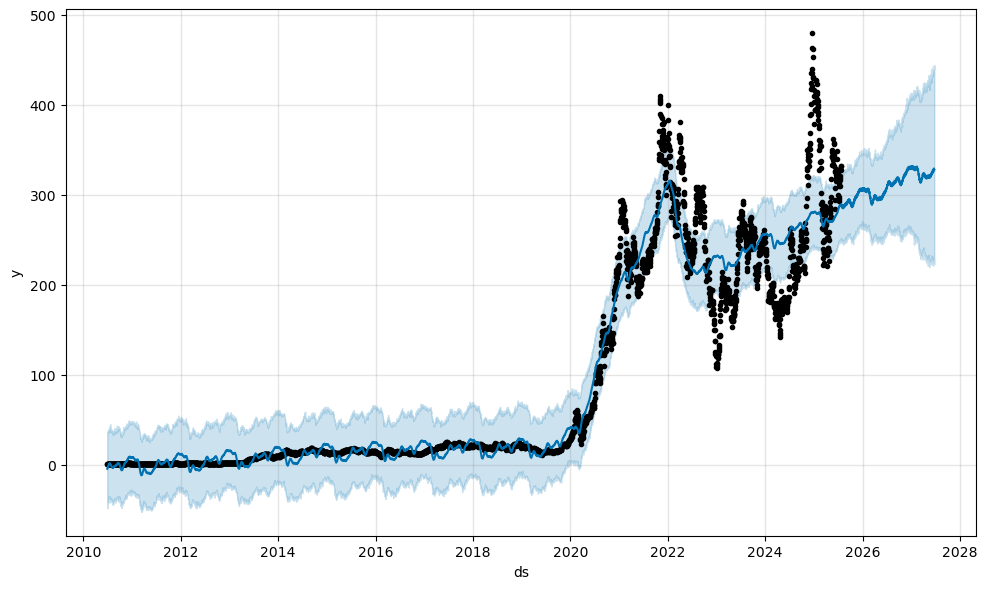

In [31]:
model.plot(forecast)
plt.show()

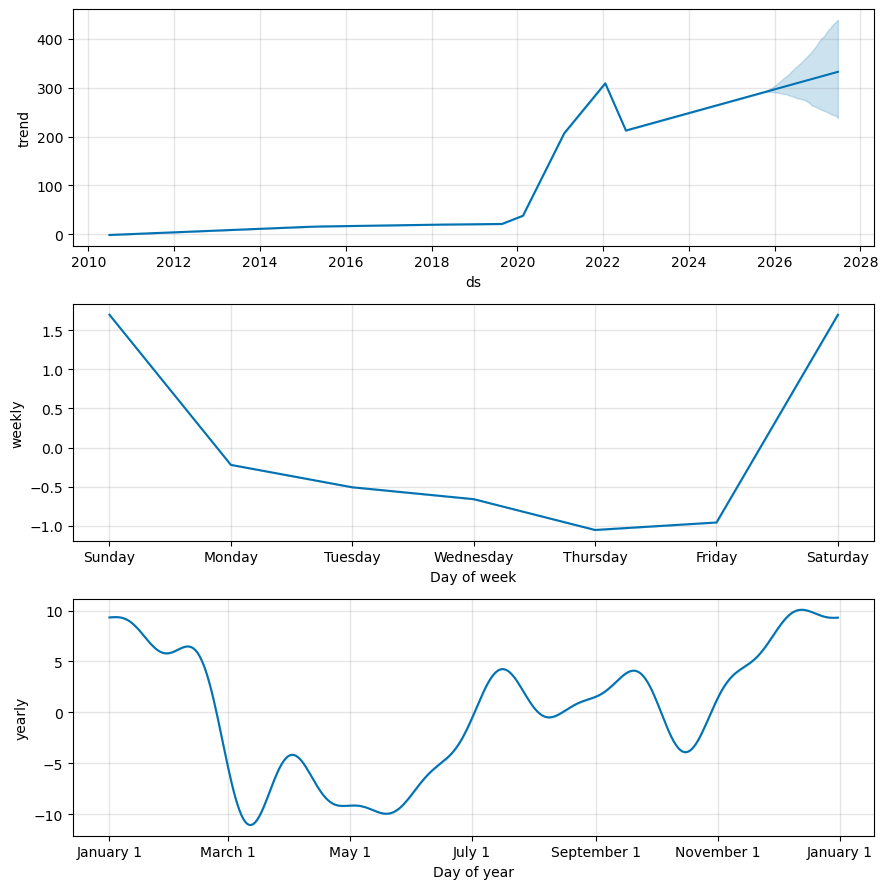

In [32]:
# decomposing the forecast into components into trends 
fig2 = model.plot_components(forecast)
plt.show()

# In‐sample fit (left side, up to ~2024): you can see how closely the blue line tracks the historical black dots. If there are systematic misses—say bias or under/over‑shooting—that tells you something about model fit.

# Forecast period (beyond your last training date): the blue line is Prophet’s extrapolated trend + seasonality (and any regressors you may have added).

# Uncertainty grows the further you go out—notice how the blue band fans out after ~2025.